In [16]:
E = EllipticCurve("389.a1")
print(E)
N = E.conductor()
print("Conductor", N)

Elliptic Curve defined by y^2 + y = x^3 + x^2 - 2*x over Rational Field
Conductor 389


In [75]:
anlist = E.anlist(2001)[1:]

In [76]:
me = lambda z, terms = 2000: sum(an * z^(n)/factorial(n) for n, an in enumerate(anlist[:terms]))

In [19]:
med = lambda z: sum(an * z^(n)/factorial(n) for n, an in enumerate(anlist[1:]))

In [77]:
me(RR(-1))

1.50139614620299

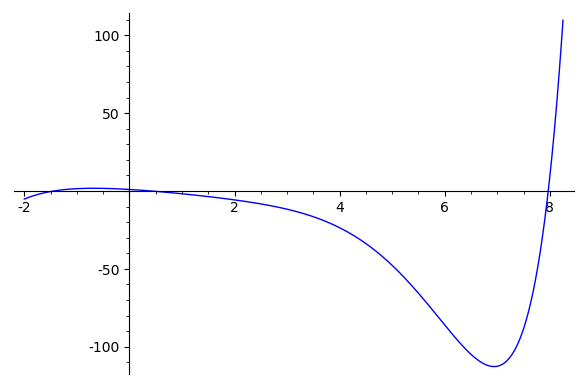

In [62]:
plot(lambda z: me(RR(z)), -2, 8.25)

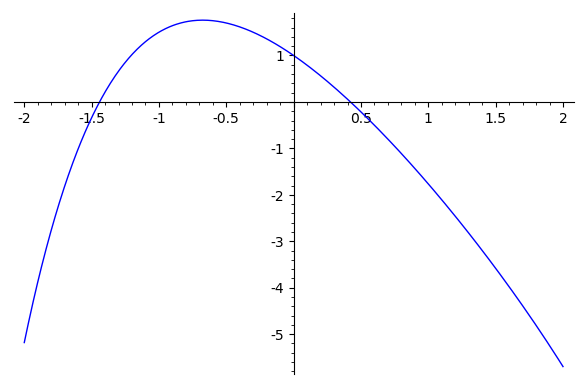

In [63]:
plot(lambda z: me(RR(z)), -2, 2)

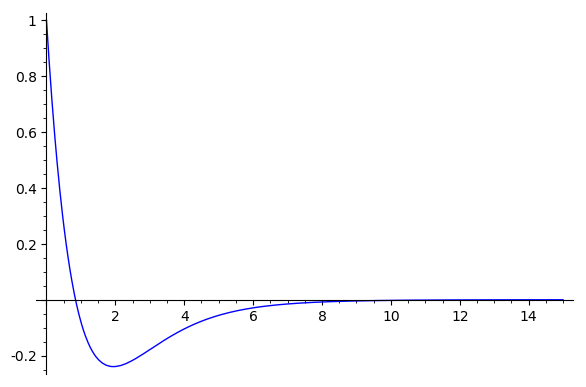

In [111]:
plot(lambda z: me(RR(0.5 * z))*e^(-z), 0, 15)

In [109]:
#plot(lambda phi: abs(me(CC(exp(phi*I)))), 0, 2*pi)

In [106]:
#plot(lambda phi: arg(me(CC(exp(phi*I)))), 0, 2*pi)

In [107]:
#plot(lambda phi: abs(me(CC(0.421781059356420 * exp(phi*I)))), 0, 2*pi)

In [108]:
#plot(lambda phi: abs(me(CC(1.44097057027295 * exp(phi*I)))), 0, 2*pi)

In [83]:
def zero_finetune(z, prec = 10^(-16), prev = set()):
    z1 = z - me(z)/med(z)
    mez1 = me(z1)
    if abs(mez1) < prec or z1 == z or z1 in prev:
        return z1
    else:
        print(abs(mez1))
        prev.add(z1)
        return zero_finetune(z1, prec = prec, prev = prev)

In [84]:
z1 = zero_finetune(0.4); z1

0.000334669039119342
1.06100577878993e-8


0.421781059356420

In [85]:
z0 = zero_finetune(-1.5); z0

0.0177778168908058
0.0000577308500697864
6.15173241404823e-10


-1.44097057027295

In [86]:
z2 = zero_finetune(RR(8)); z2

0.270653793112712
0.000238708873589074
1.86368646335346e-10
2.95486637499347e-13
7.88264690867735e-14


7.96892424103156

In [25]:
log(z1)

-3.41639468702476

In [29]:
z0 / z1

-3.41639468702476

In [ ]:
# WOW!

We have:
$$\log(z_1) = z_0 / z_1$$
$$z_0 = z_1\log(z_1)$$

In [105]:
z2 / z1

18.8935090001221